In [6]:
import os
import pandas as pd
import json

# Replace this with the path to the directory where your files are located
directory_path = 'mood_datas'

# Check if the directory exists
if not os.path.exists(directory_path):
    print(f"The directory {directory_path} does not exist.")
else:
    # Check if the directory is empty
    if not os.listdir(directory_path):
        print(f"The directory {directory_path} is empty.")
    else:
        # Print the files in the directory
        print(f"Files in the directory {directory_path}:")
        print(os.listdir(directory_path))

# List all files in the directory
all_files = os.listdir(directory_path)

# Filter out the files ending with '_M' and '_A'
mood_m_files = [file for file in all_files if file.endswith('_M')]
mood_a_files = [file for file in all_files if file.endswith('_A')]

# Define a function to parse the JSON and extract the values
def parse_mood_values(mood_value_str):
    mood_value_dict = json.loads(mood_value_str.replace("'", "\""))  # Replace single quotes with double quotes for valid JSON
    valence = mood_value_dict['valence']['value']
    valence_confidence = mood_value_dict['valence']['confidence']
    attention = mood_value_dict['attention']['value']
    attention_confidence = mood_value_dict['attention']['confidence']
    return valence, valence_confidence, attention, attention_confidence

# Dictionary to hold each DataFrame
data_frames = {}

# Process each pair of files
for m_file in mood_m_files:
    base_name = m_file.replace('_M', '')
    a_file = base_name + '_A'
    
    if a_file in mood_a_files:
        # Path to the _M and _A files
        path_to_m_file = os.path.join(directory_path, m_file)
        path_to_a_file = os.path.join(directory_path, a_file)
        
        # Load the data
        data_m = pd.read_csv(path_to_m_file)
        data_a = pd.read_csv(path_to_a_file)
        
        # Apply the function to extract values
        data_m[['valence', 'valence_confidence', 'attention', 'attention_confidence']] = data_m['MoodValue'].apply(
            lambda x: pd.Series(parse_mood_values(x))
        )
        data_a[['valence', 'valence_confidence', 'attention', 'attention_confidence']] = data_a['MoodValue'].apply(
            lambda x: pd.Series(parse_mood_values(x))
        )
        
        # Drop the original 'MoodValue' column and the 'Unnamed: 0' column
        data_m.drop(['MoodValue', 'Unnamed: 0'], axis=1, inplace=True)
        data_a.drop(['MoodValue', 'Unnamed: 0'], axis=1, inplace=True)
        
        # Add the DataFrames to the dictionary
        data_frames[base_name + '_M'] = data_m
        data_frames[base_name + '_A'] = data_a

# Now, data_frames contains all the separate dataframes for each pair of _M and _A files

data_frames

Files in the directory mood_datas:
['mood_data_GT7KG_M', 'mood_data_9V120_A', 'mood_data_REQGJ_A', 'mood_data_XEPK9_A', 'mood_data_V2YB9_M', 'mood_data_BIOL5_M', 'mood_data_WYCWZ_M', 'mood_data_ONY13_M', 'mood_data_XDS9D_A', 'mood_data_BJLVA_M', 'mood_data_XUM1U_M', 'mood_data_P1SUC_M', 'mood_data_4UPUF_A', 'mood_data_OX4SS_M', 'mood_data_1TRNZ_M', 'mood_data_JAT8H_M', 'mood_data_9V120_M', 'mood_data_REQGJ_M', 'mood_data_GT7KG_A', 'mood_data_V2YB9_A', 'mood_data_XEPK9_M', 'mood_data_XDS9D_M', 'mood_data_L4KJ2_A', 'mood_data_BJLVA_A', 'mood_data_ONY13_A', 'mood_data_BIOL5_A', 'mood_data_JAT8H_A', 'mood_data_1TRNZ_A', 'mood_data_4UPUF_M', 'mood_data_OX4SS_A', 'mood_data_P1SUC_A', 'mood_data_XUM1U_A']


{'mood_data_GT7KG_M':        Timestamp   valence  valence_confidence  attention  \
 0   1.712784e+09 -0.990215            0.994487   0.776414   
 1   1.712784e+09 -0.346575            0.997414   0.857823   
 2   1.712784e+09 -0.771301            0.998612   0.902120   
 3   1.712784e+09 -0.269955            0.992562   0.901824   
 4   1.712784e+09 -0.094484            0.991201   0.893894   
 ..           ...       ...                 ...        ...   
 58  1.712784e+09 -1.000000            0.996254   0.740749   
 59  1.712784e+09 -1.000000            0.976935   0.298683   
 60  1.712784e+09 -1.000000            0.971970   0.559402   
 61  1.712784e+09  0.300000            0.948136   0.526586   
 62  1.712784e+09  0.755000            0.933355   0.463879   
 
     attention_confidence  
 0               0.999429  
 1               0.999421  
 2               0.999499  
 3               0.999522  
 4               0.999491  
 ..                   ...  
 58              0.999420  
 59      

In [7]:
# Iterate over the dictionary items
for file_name, df in data_frames.items():
    print('1')
    print(f"First few rows of {file_name}:")
    print(df.head(), '\n')  # Print the first five rows of each DataFrame


1
First few rows of mood_data_GT7KG_M:
      Timestamp   valence  valence_confidence  attention  attention_confidence
0  1.712784e+09 -0.990215            0.994487   0.776414              0.999429
1  1.712784e+09 -0.346575            0.997414   0.857823              0.999421
2  1.712784e+09 -0.771301            0.998612   0.902120              0.999499
3  1.712784e+09 -0.269955            0.992562   0.901824              0.999522
4  1.712784e+09 -0.094484            0.991201   0.893894              0.999491 

1
First few rows of mood_data_GT7KG_A:
      Timestamp   valence  valence_confidence  attention  attention_confidence
0  1.712784e+09 -0.972028            0.901756   0.836089              0.999410
1  1.712784e+09 -0.990210            0.880319   0.829599              0.998886
2  1.712784e+09 -0.996573            0.818716   0.820958              0.999663
3  1.712784e+09 -0.781524            0.245615   0.643804              0.299899
4  1.712784e+09  0.131763            0.885316   0.9

## Mood Data Analysis
Let's plot the Valence and Attention values from the mood data.

In [8]:
data1.head()

NameError: name 'data1' is not defined

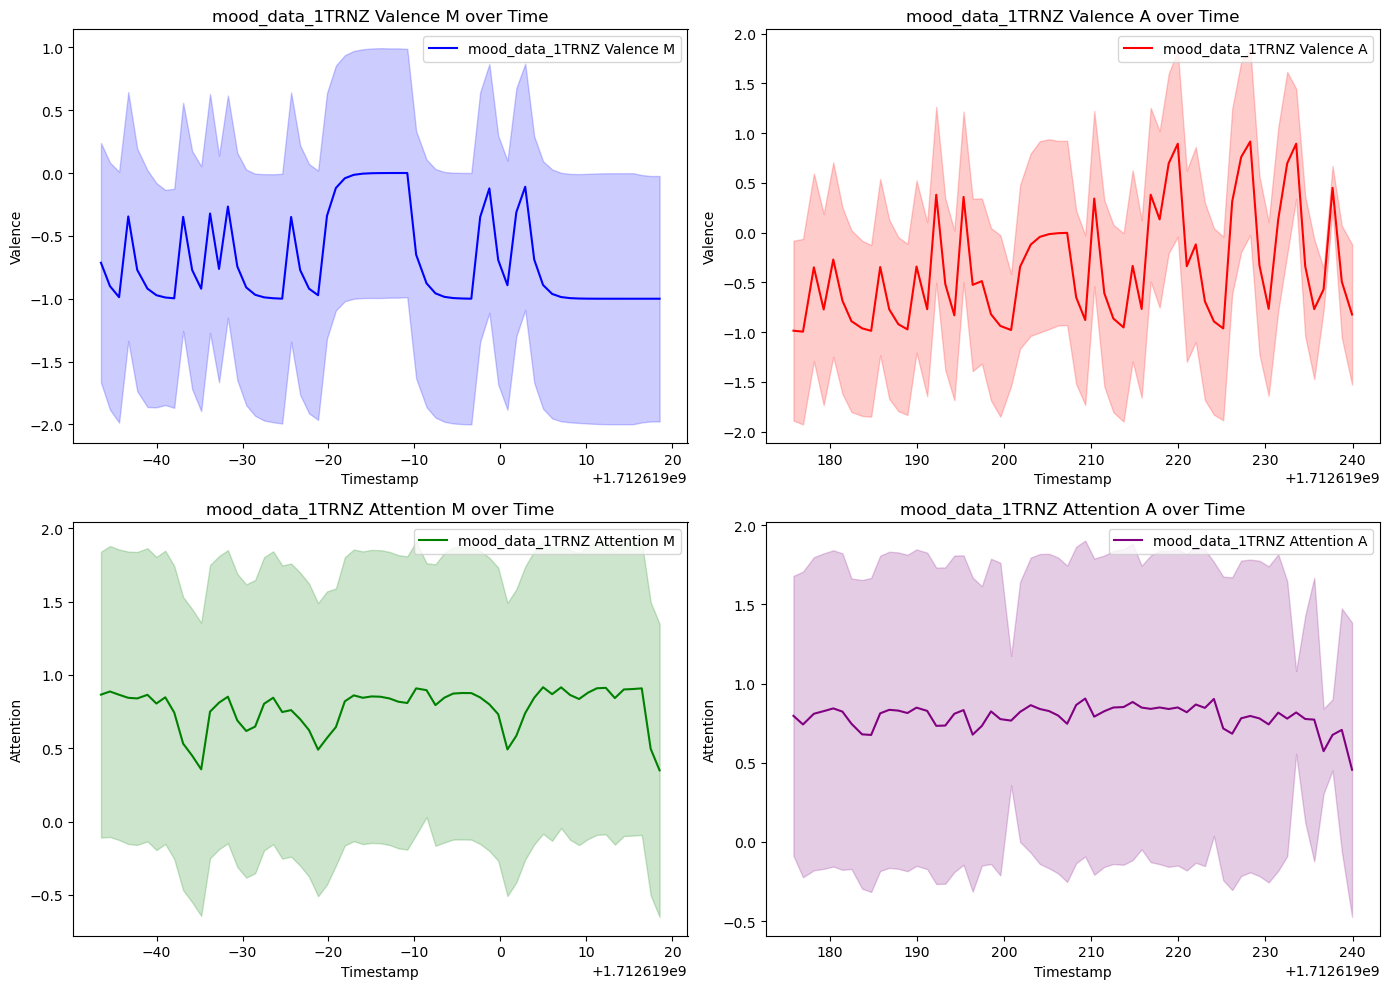

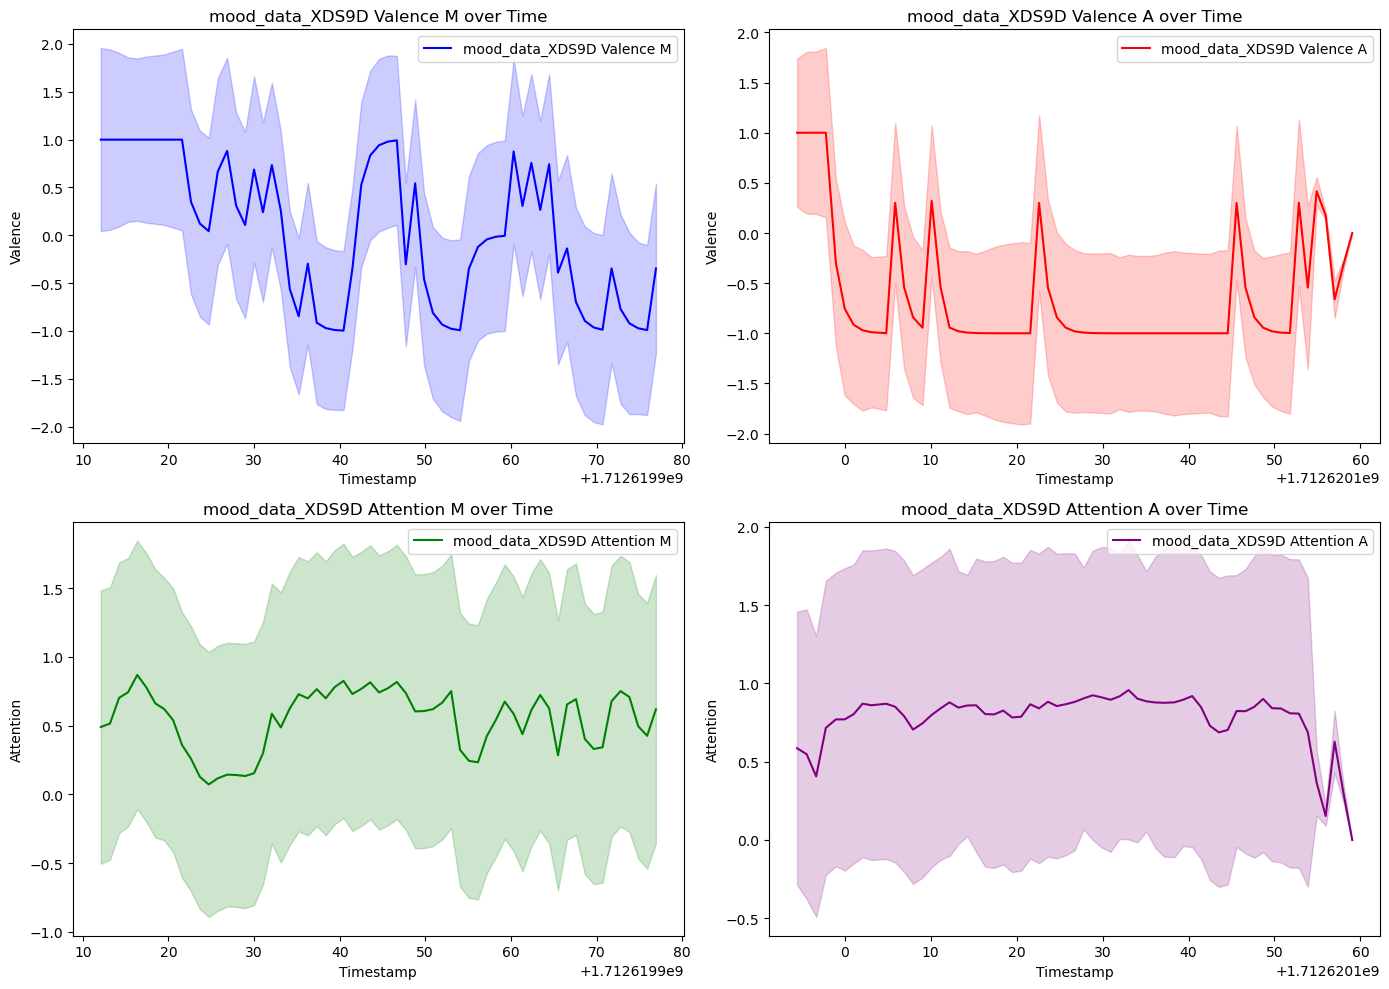

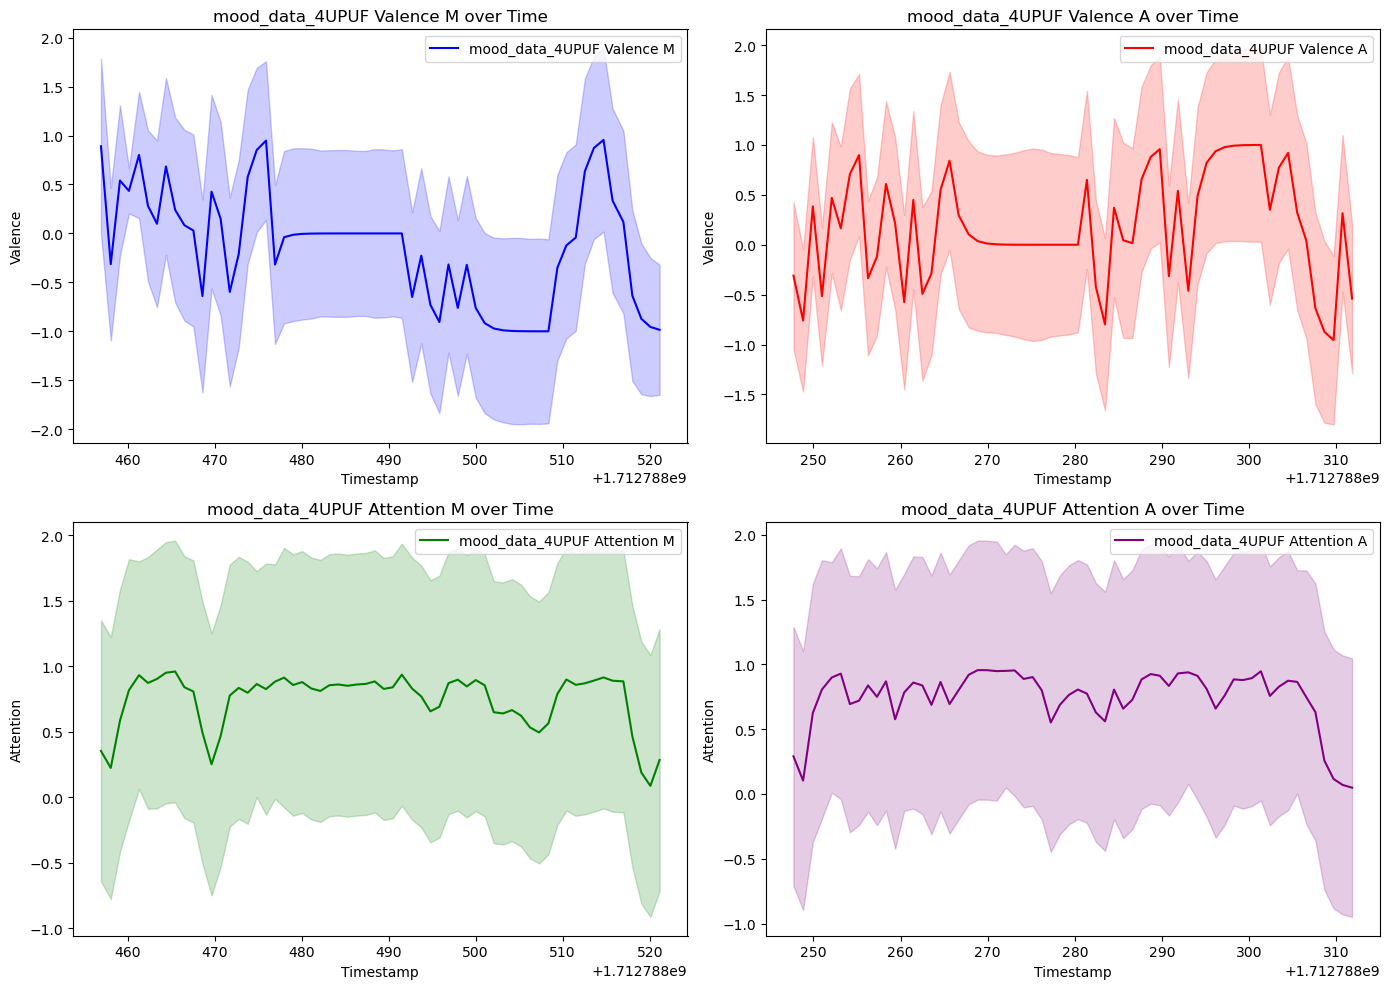

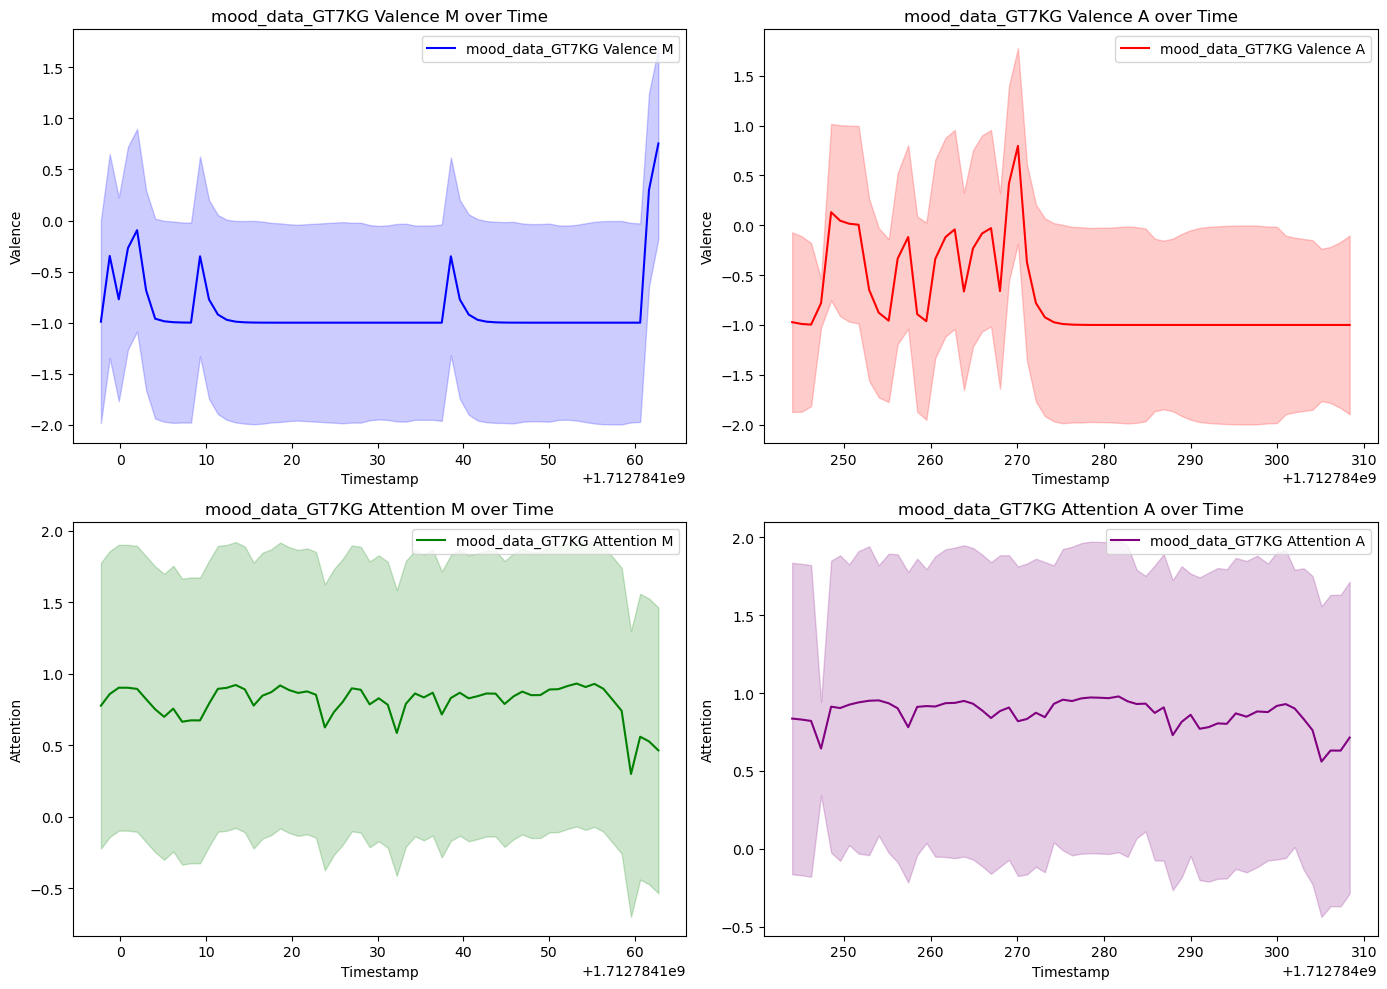

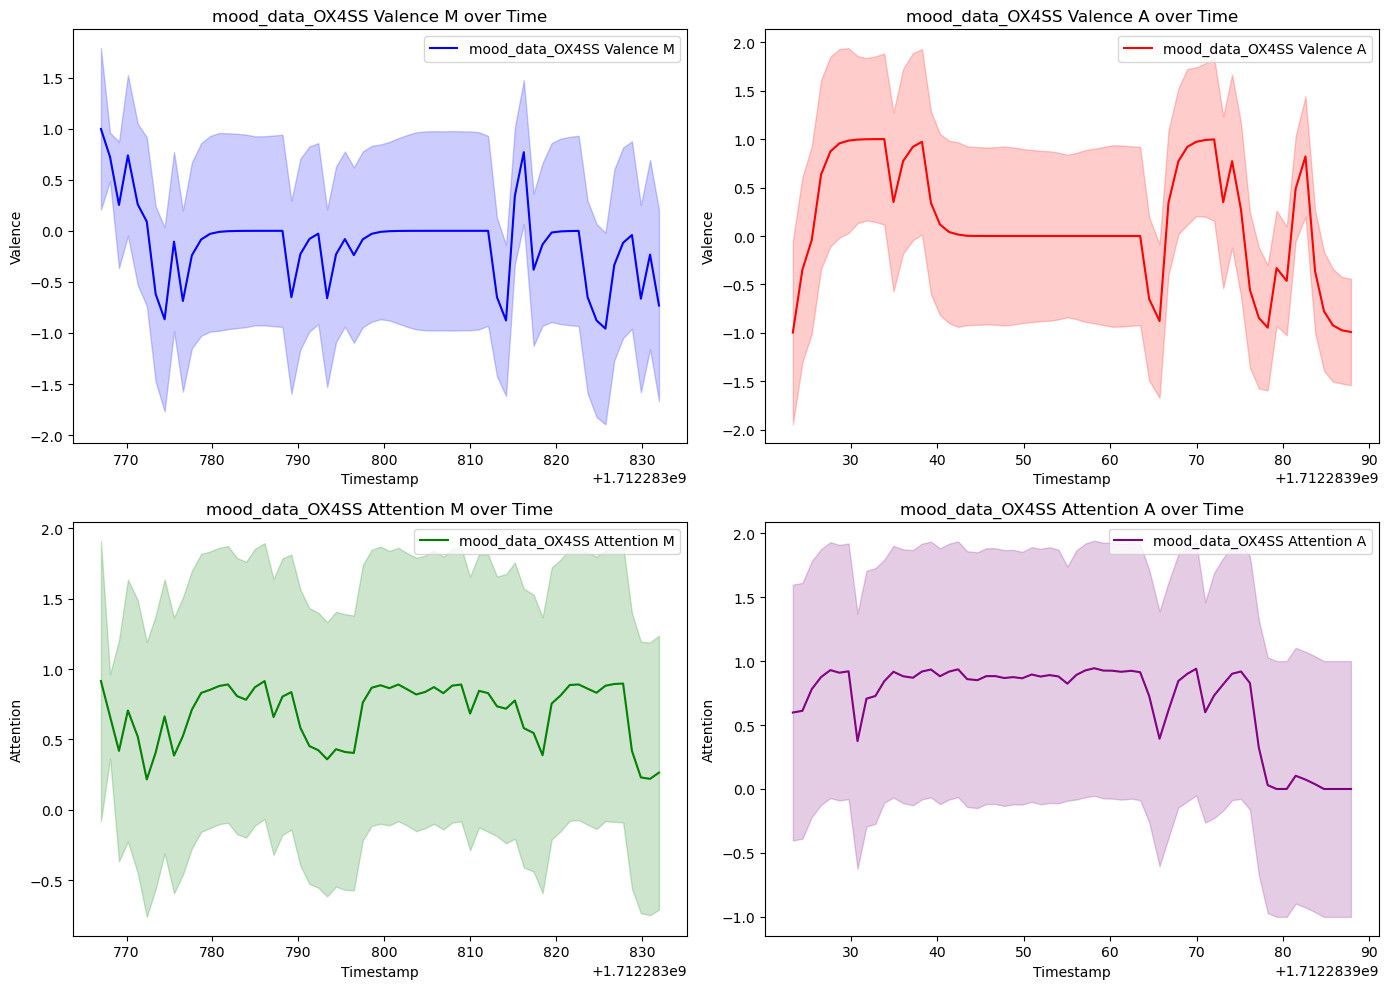

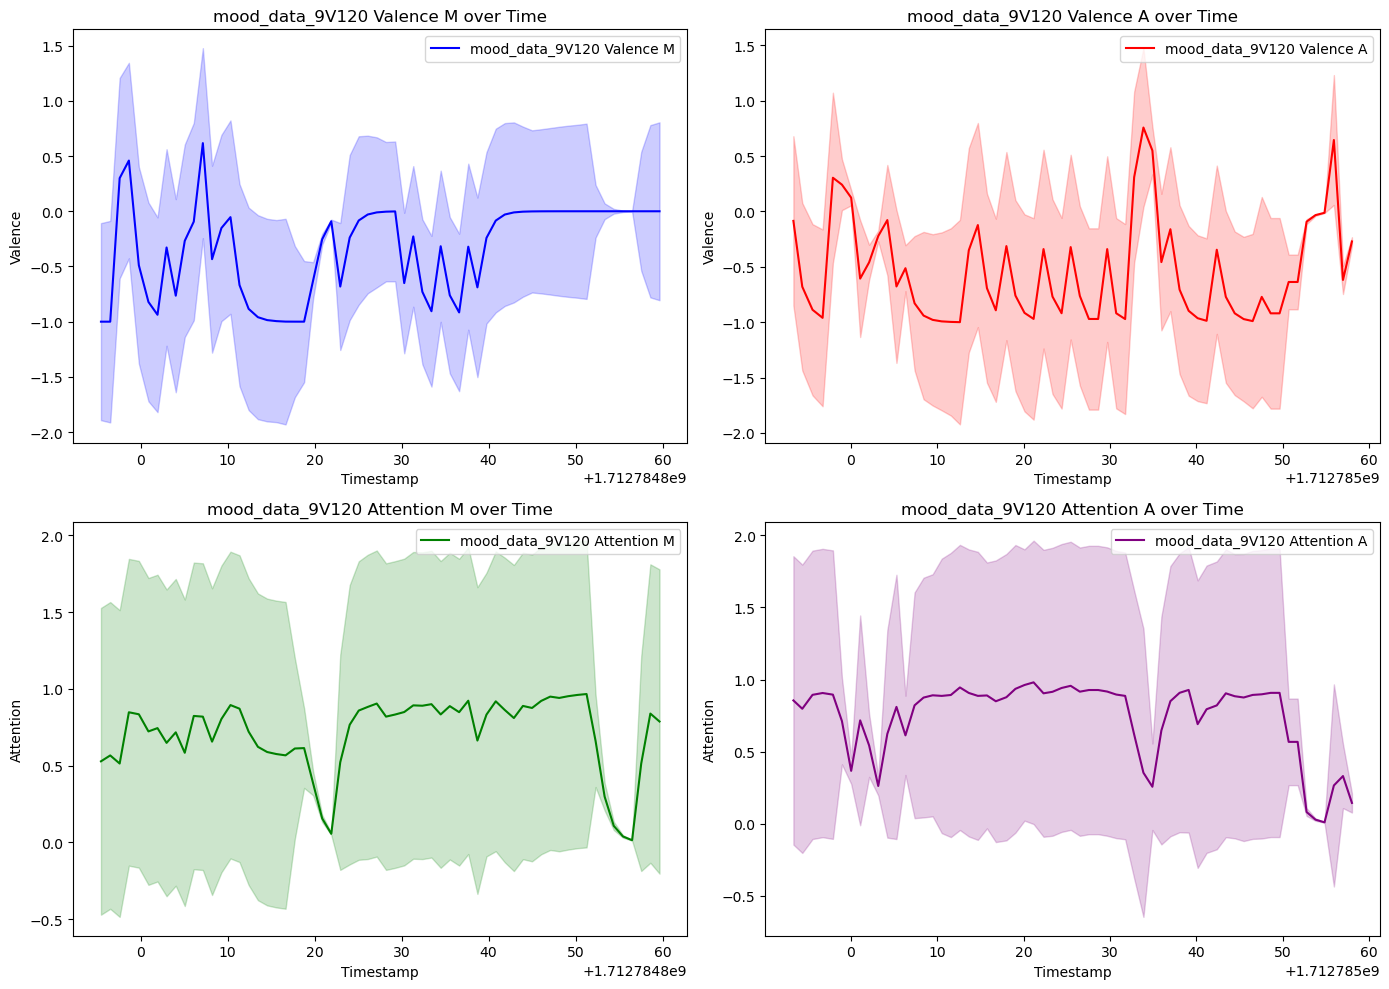

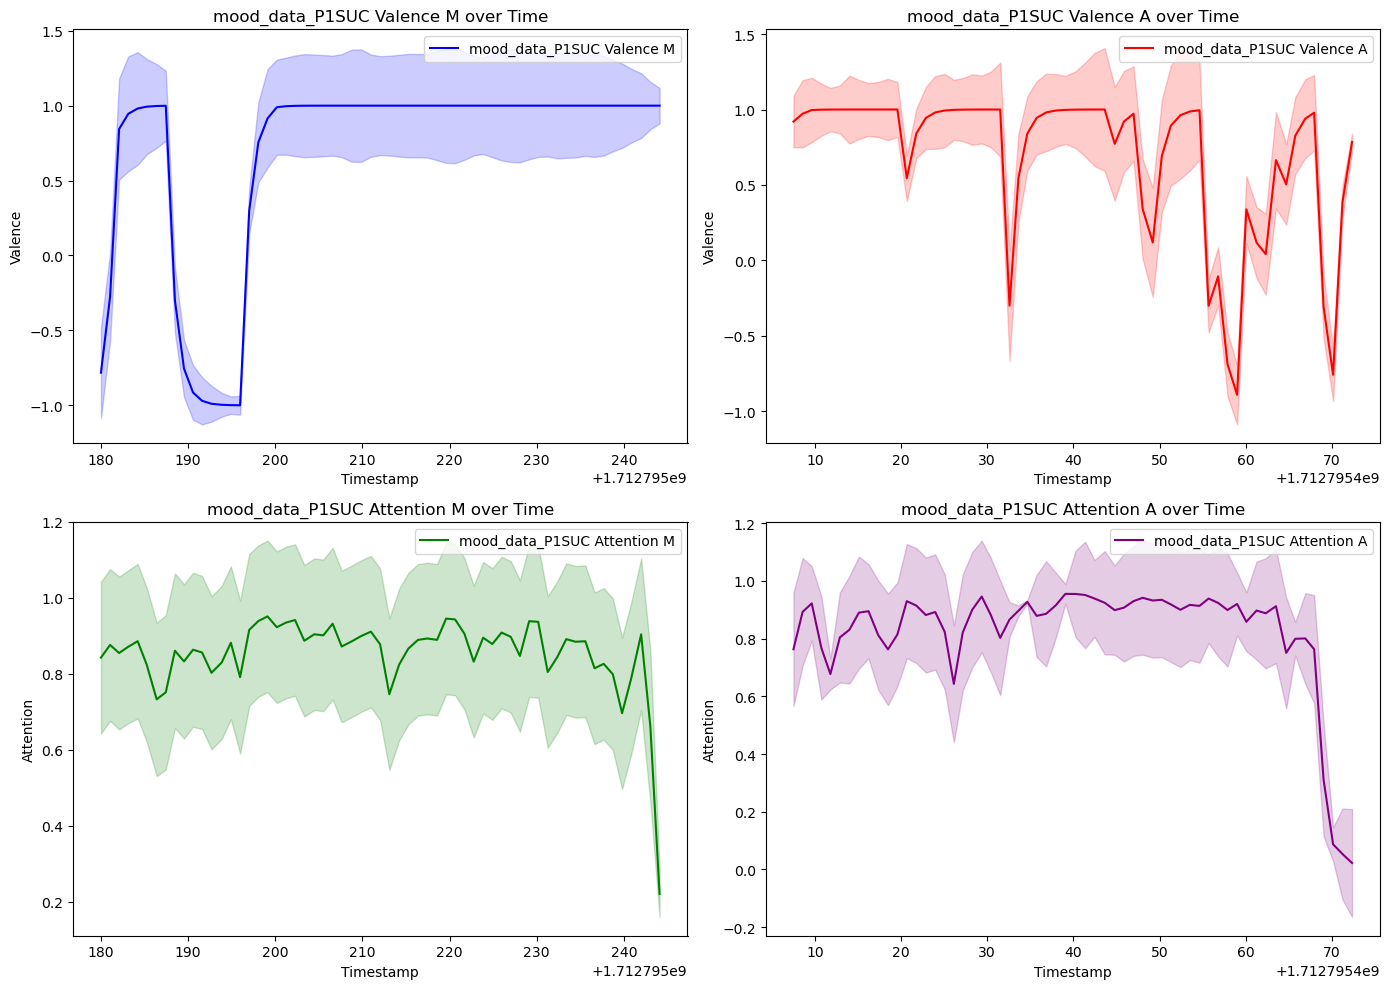

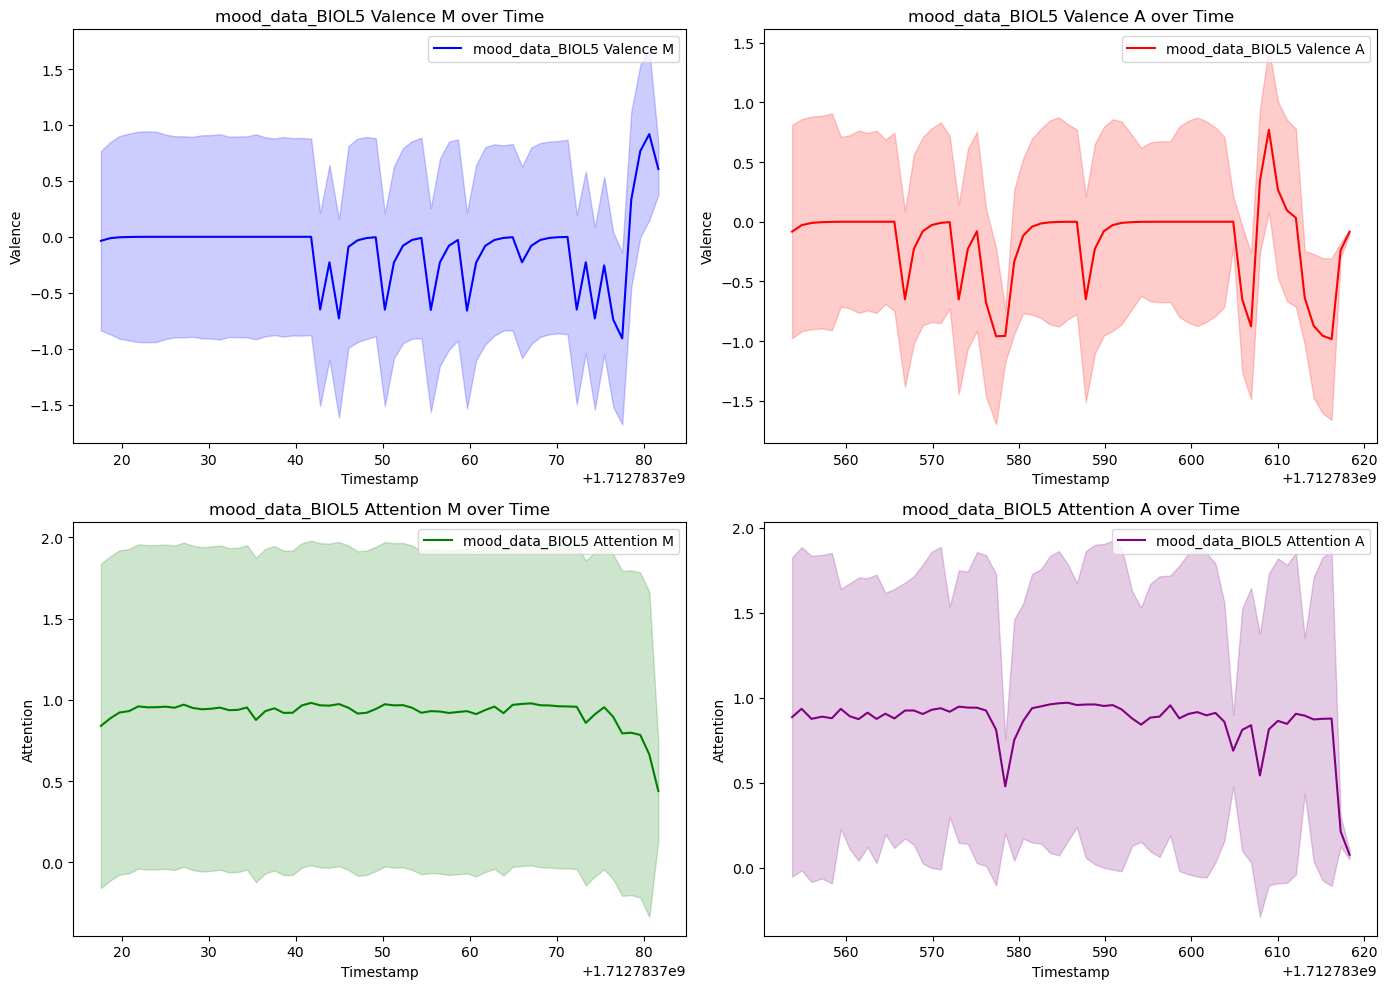

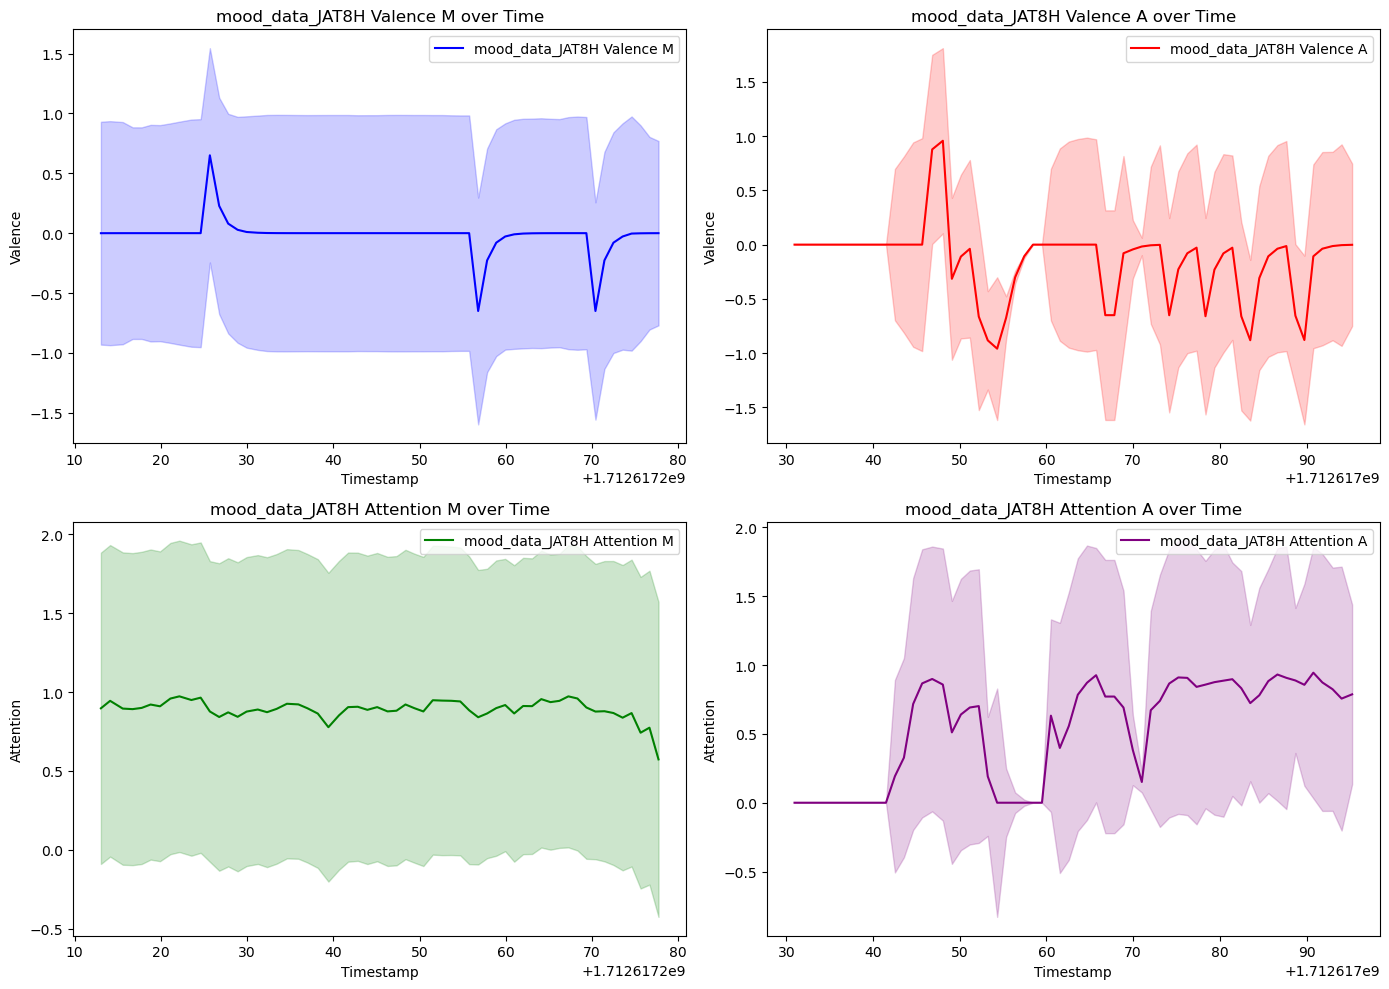

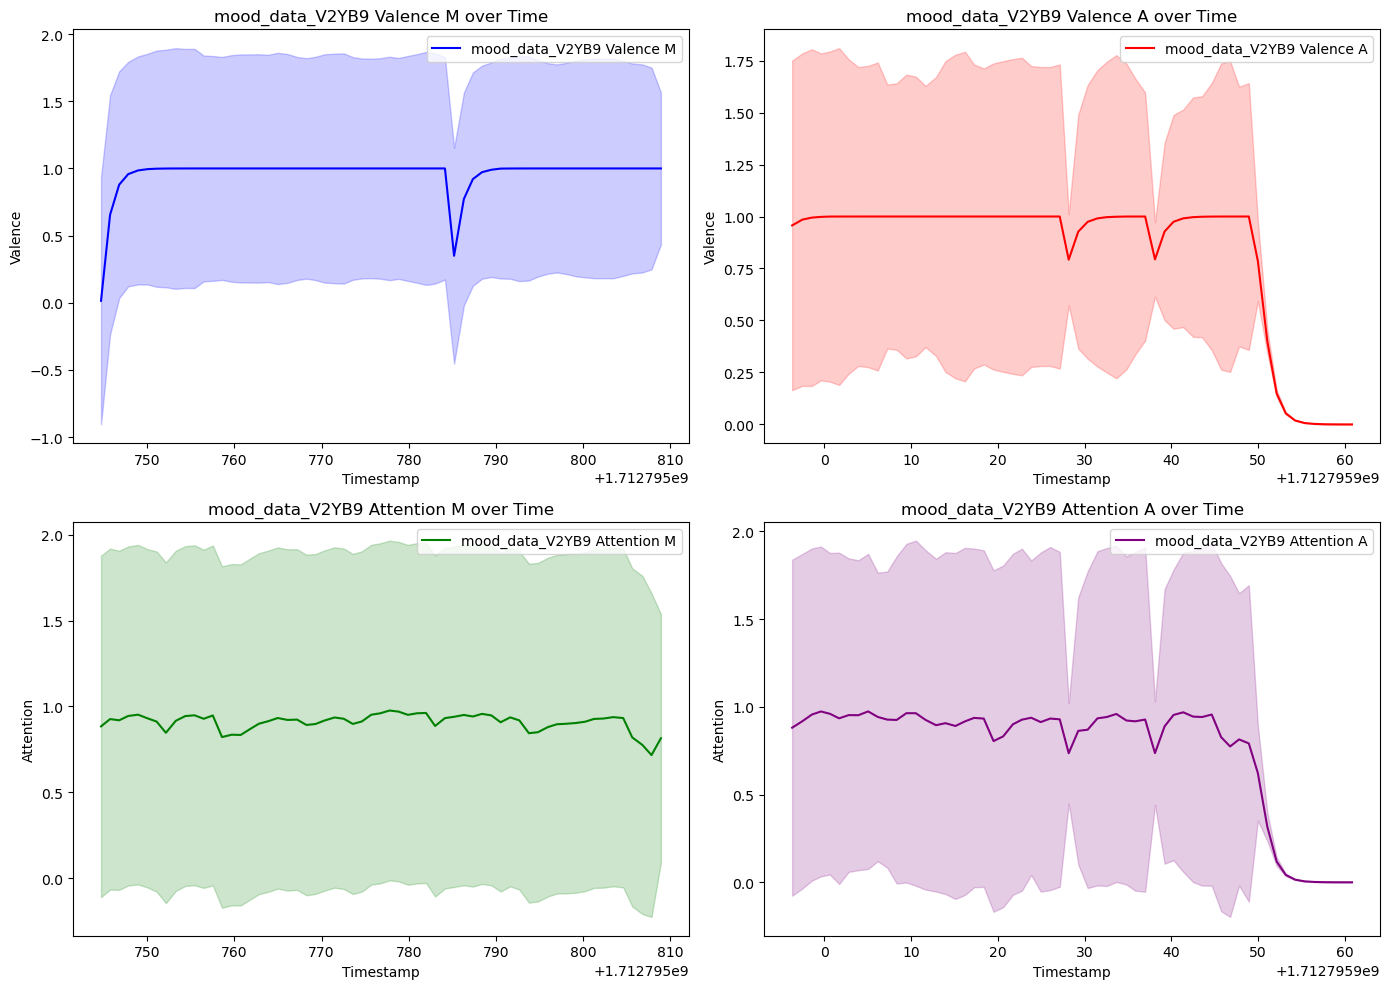

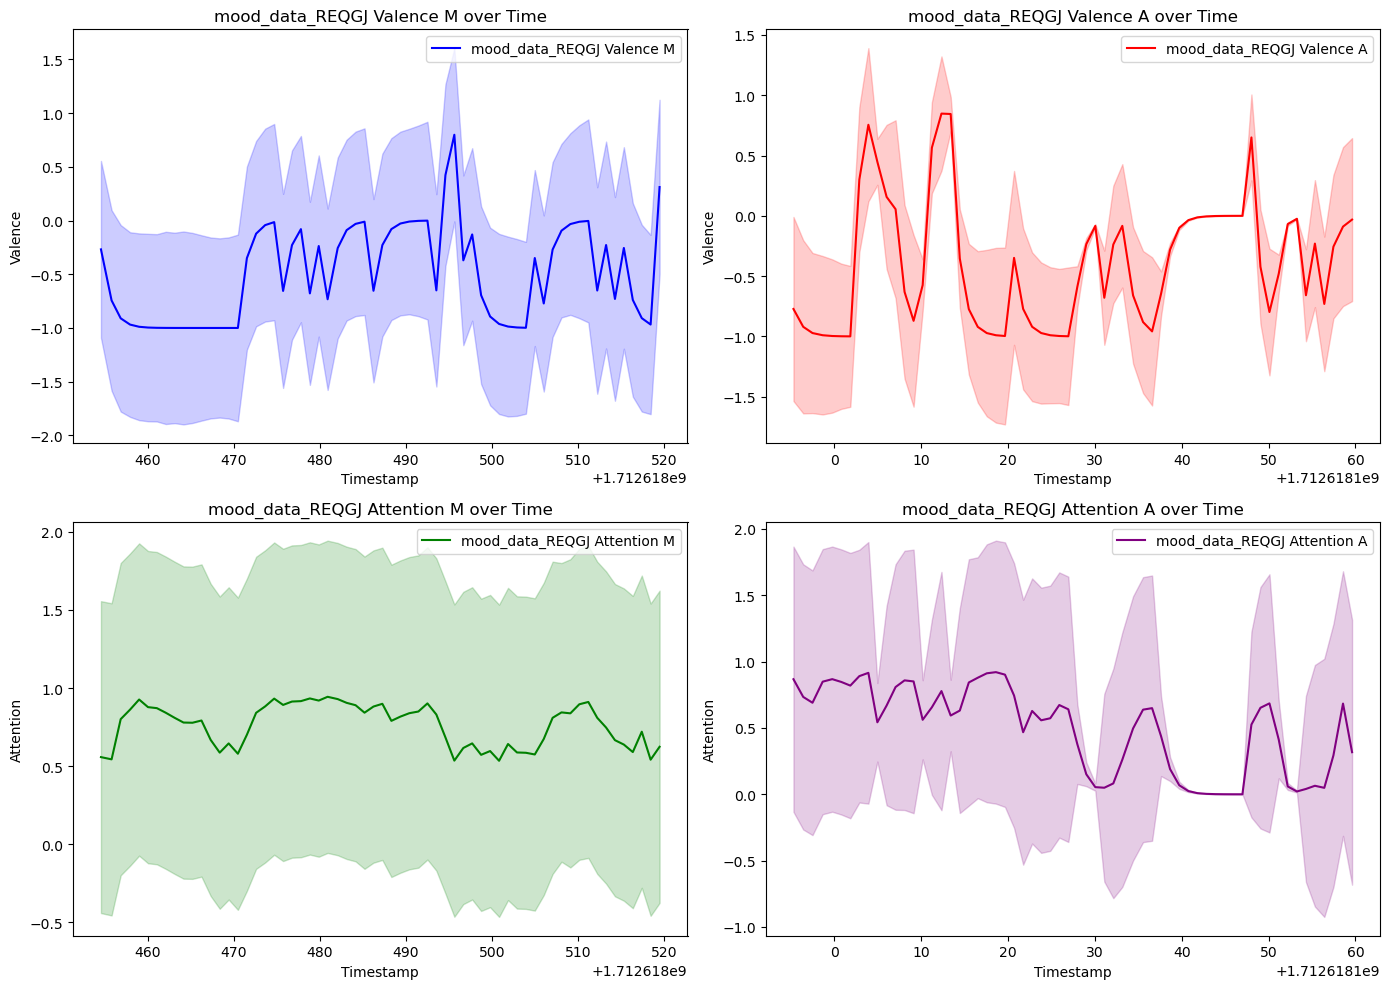

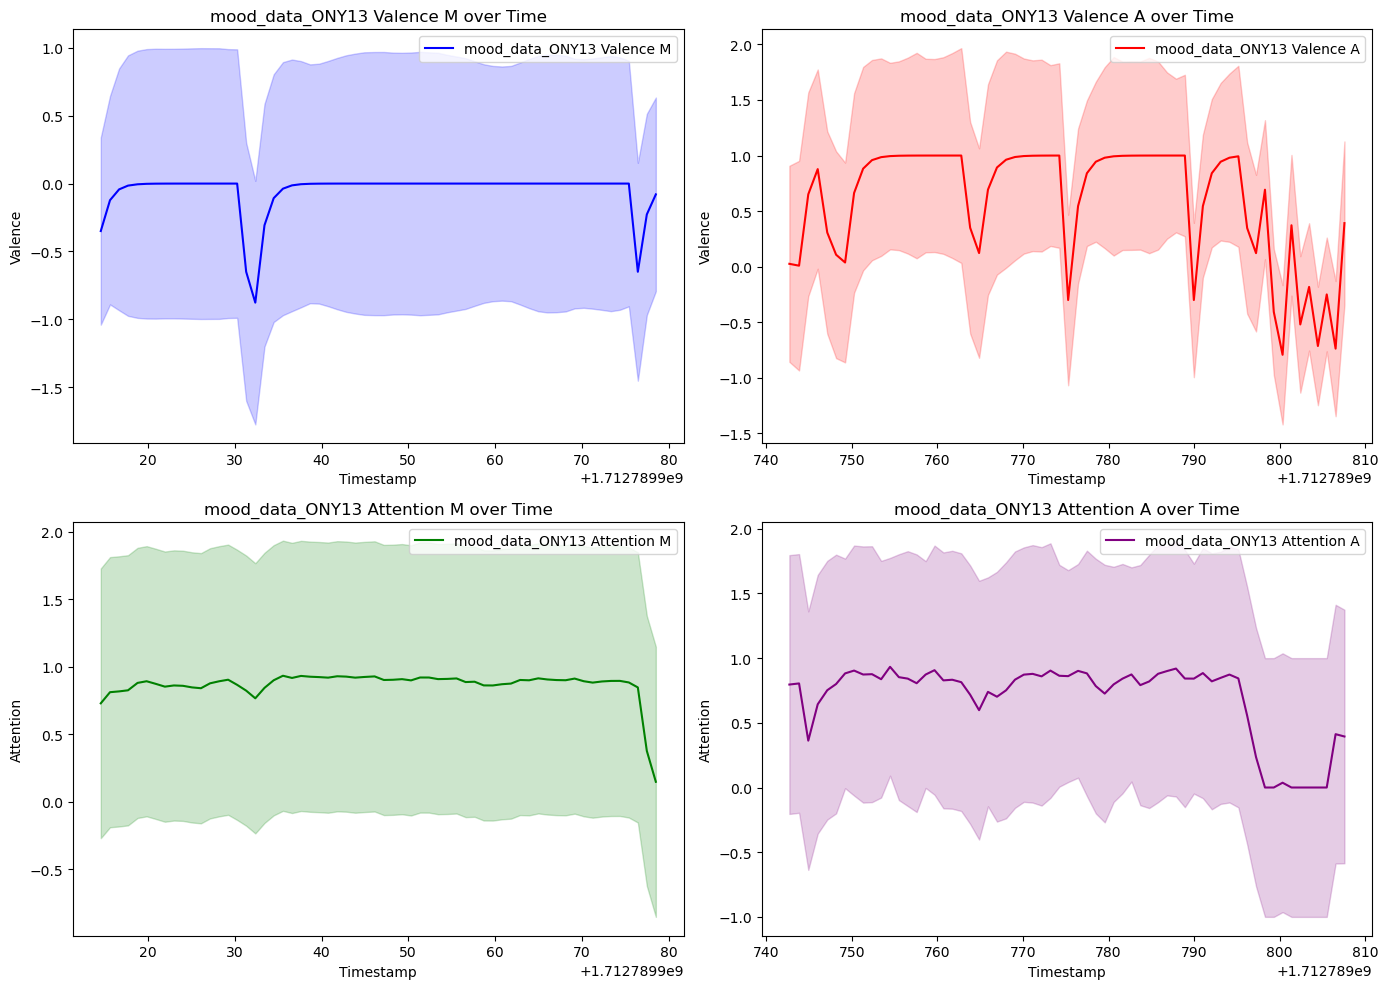

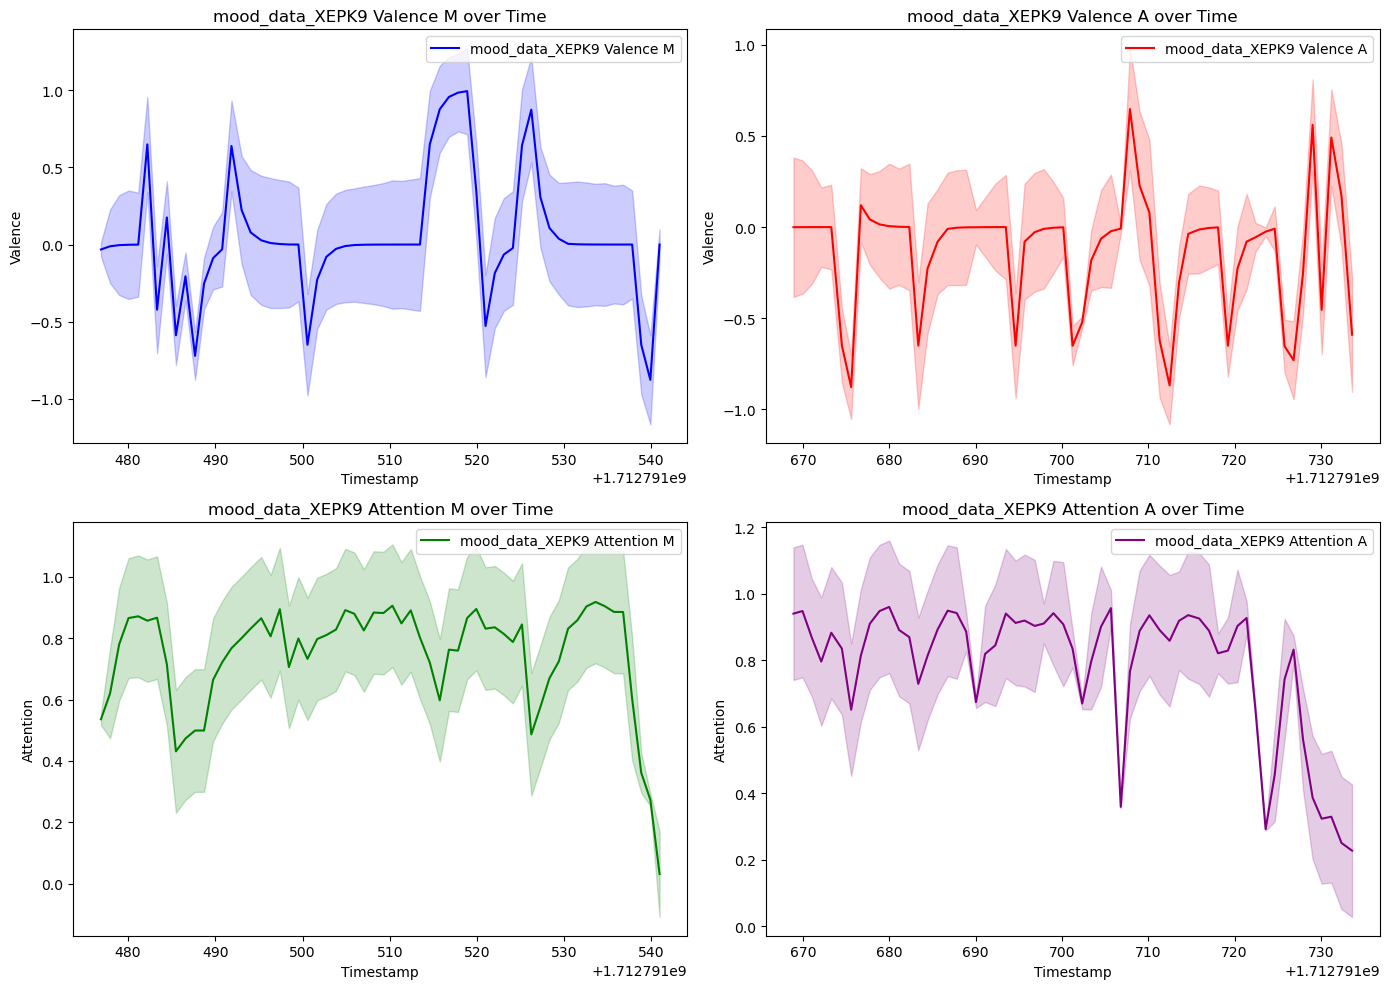

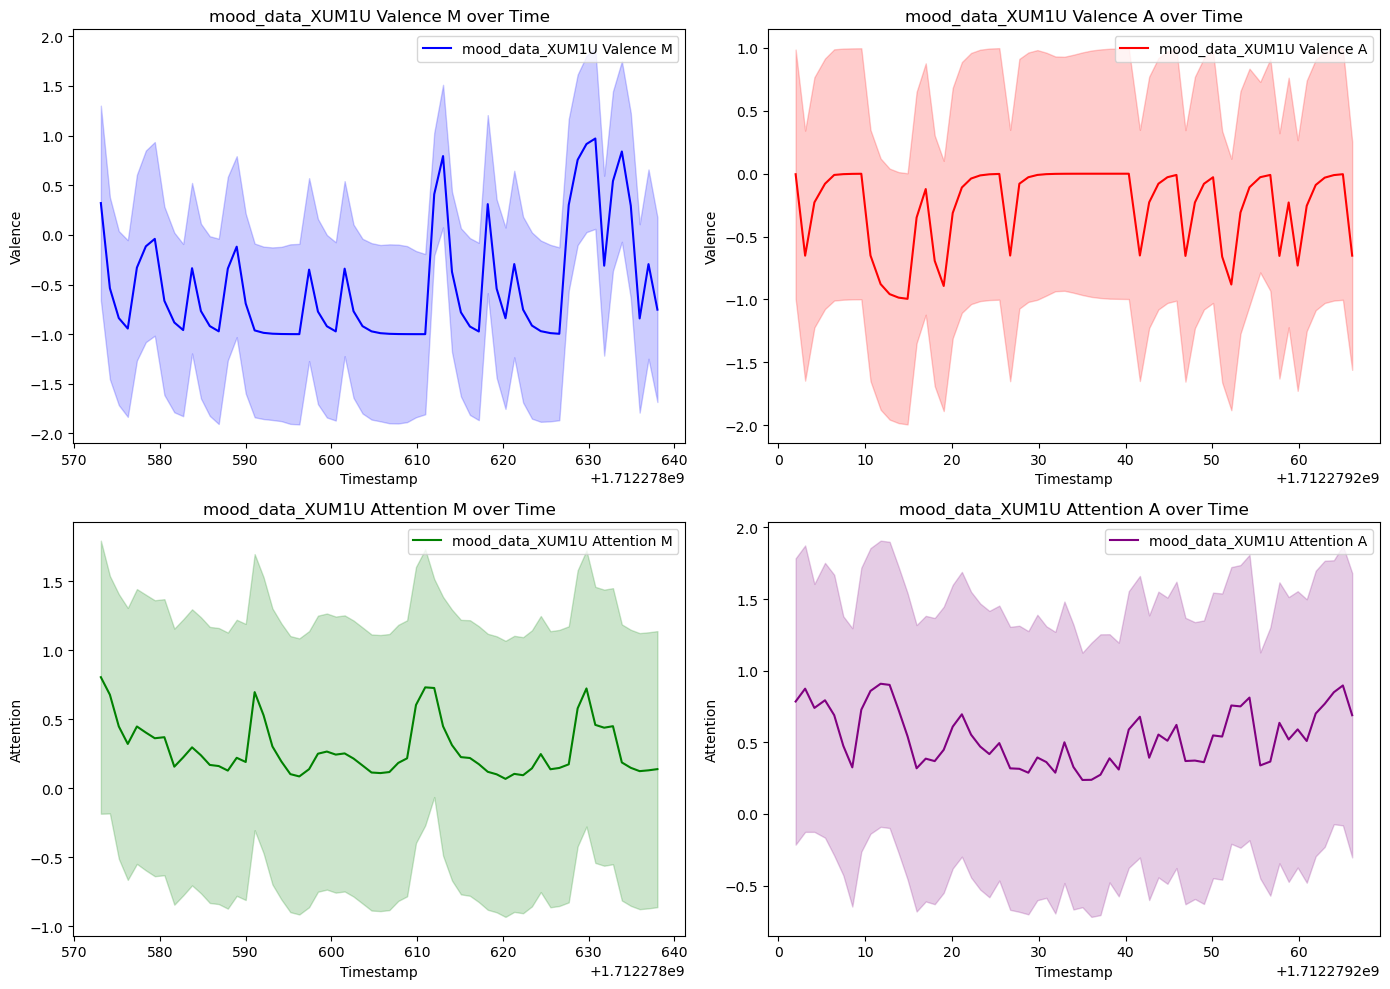

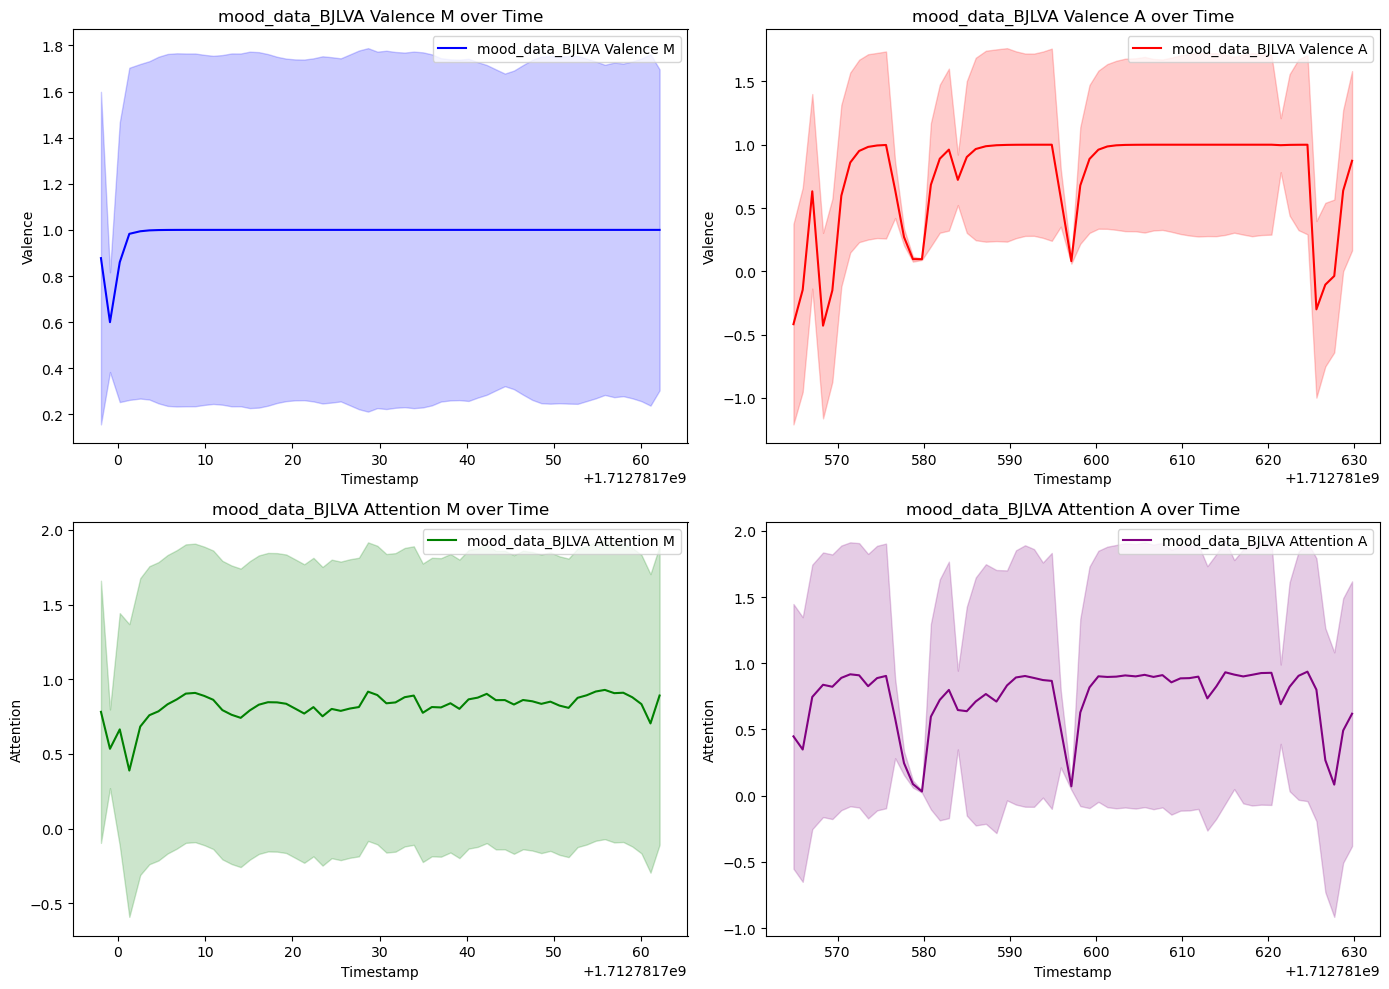

In [9]:
import matplotlib.pyplot as plt

# Function to plot valence and attention
def plot_mood_data(df_m, df_a, base_name):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 subplot array

    # Plot Valence for condition M
    axs[0, 0].plot(df_m['Timestamp'], df_m['valence'], label=f'{base_name} Valence M', color='blue')
    axs[0, 0].fill_between(df_m['Timestamp'], df_m['valence'] - df_m['valence_confidence'], 
                     df_m['valence'] + df_m['valence_confidence'], alpha=0.2, color='blue')
    axs[0, 0].set_title(f'{base_name} Valence M over Time')
    axs[0, 0].set_xlabel('Timestamp')
    axs[0, 0].set_ylabel('Valence')
    axs[0, 0].legend()

    # Plot Valence for condition A
    axs[0, 1].plot(df_a['Timestamp'], df_a['valence'], label=f'{base_name} Valence A', color='red')
    axs[0, 1].fill_between(df_a['Timestamp'], df_a['valence'] - df_a['valence_confidence'], 
                     df_a['valence'] + df_a['valence_confidence'], alpha=0.2, color='red')
    axs[0, 1].set_title(f'{base_name} Valence A over Time')
    axs[0, 1].set_xlabel('Timestamp')
    axs[0, 1].set_ylabel('Valence')
    axs[0, 1].legend()

    # Plot Attention for condition M
    axs[1, 0].plot(df_m['Timestamp'], df_m['attention'], label=f'{base_name} Attention M', color='green')
    axs[1, 0].fill_between(df_m['Timestamp'], df_m['attention'] - df_m['attention_confidence'], 
                     df_m['attention'] + df_m['attention_confidence'], alpha=0.2, color='green')
    axs[1, 0].set_title(f'{base_name} Attention M over Time')
    axs[1, 0].set_xlabel('Timestamp')
    axs[1, 0].set_ylabel('Attention')
    axs[1, 0].legend()

    # Plot Attention for condition A
    axs[1, 1].plot(df_a['Timestamp'], df_a['attention'], label=f'{base_name} Attention A', color='purple')
    axs[1, 1].fill_between(df_a['Timestamp'], df_a['attention'] - df_a['attention_confidence'], 
                     df_a['attention'] + df_a['attention_confidence'], alpha=0.2, color='purple')
    axs[1, 1].set_title(f'{base_name} Attention A over Time')
    axs[1, 1].set_xlabel('Timestamp')
    axs[1, 1].set_ylabel('Attention')
    axs[1, 1].legend()

    plt.tight_layout()
    plt.show()

# Iterate over the data frames and plot each pair of _M and _A data
for base_name in set(name.replace('_M', '').replace('_A', '') for name in data_frames):
    df_m = data_frames[base_name + '_M']
    df_a = data_frames[base_name + '_A']
    plot_mood_data(df_m, df_a, base_name)


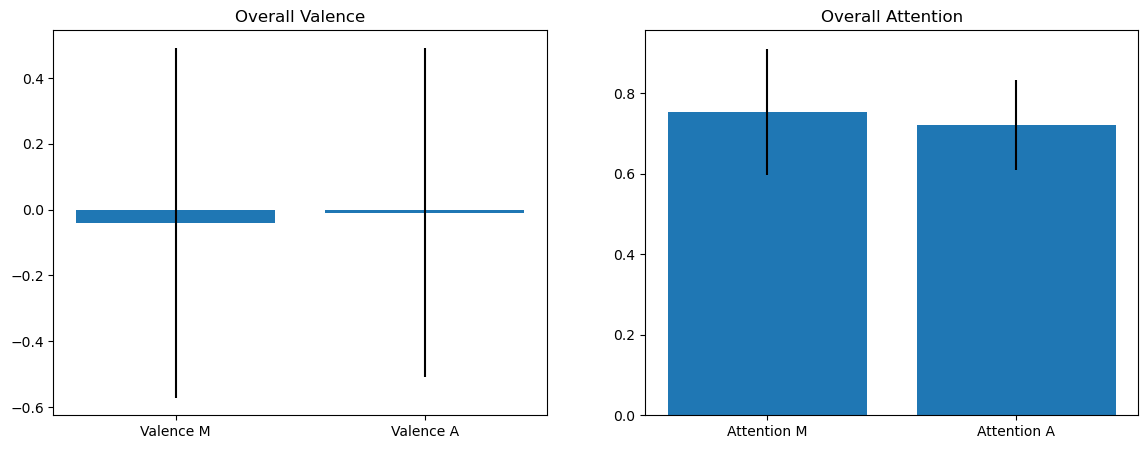

Valence t-test results: TtestResult(statistic=-0.15572485965263713, pvalue=0.877367174216134, df=28.0)
Attention t-test results: TtestResult(statistic=0.6189137494804298, pvalue=0.5409763463047408, df=28.0)


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import numpy as np
# Assuming data_frames is a dictionary containing all your data

# Initialize dictionaries to hold overall results
overall_valence = {'M': [], 'A': []}
overall_attention = {'M': [], 'A': []}

# Process each pair of data and accumulate the mean valence and attention
for base_name in set(name[:-2] for name in data_frames):
    df_m = data_frames[base_name + '_M']
    df_a = data_frames[base_name + '_A']
    
    # Compute mean valence and attention for both conditions
    overall_valence['M'].append(df_m['valence'].mean())
    overall_valence['A'].append(df_a['valence'].mean())
    overall_attention['M'].append(df_m['attention'].mean())
    overall_attention['A'].append(df_a['attention'].mean())

# Perform t-tests to compare the means of the two conditions
valence_ttest = ttest_ind(overall_valence['M'], overall_valence['A'])
attention_ttest = ttest_ind(overall_attention['M'], overall_attention['A'])

# Plot overall results for valence and attention
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].bar(['Valence M', 'Valence A'], [np.mean(overall_valence['M']), np.mean(overall_valence['A'])], 
           yerr=[np.std(overall_valence['M']), np.std(overall_valence['A'])])
axs[0].set_title('Overall Valence')

axs[1].bar(['Attention M', 'Attention A'], [np.mean(overall_attention['M']), np.mean(overall_attention['A'])], 
           yerr=[np.std(overall_attention['M']), np.std(overall_attention['A'])])
axs[1].set_title('Overall Attention')

plt.show()

# Print t-test results
print(f"Valence t-test results: {valence_ttest}")
print(f"Attention t-test results: {attention_ttest}")


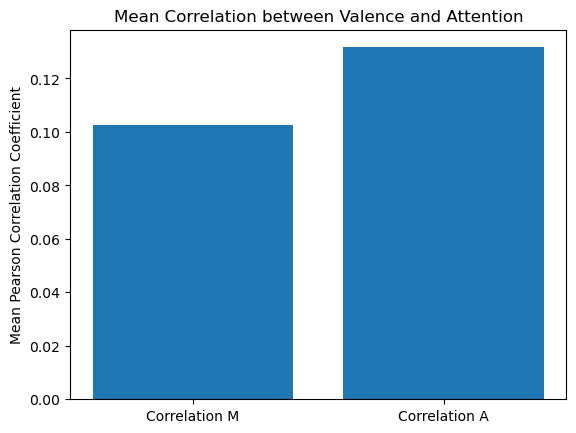

Mean correlation in monotone condition (M): 0.1024670553757798
Mean correlation in gesturing condition (A): 0.13164909781820186


In [11]:
from scipy.stats import pearsonr

# Initialize lists to hold correlation coefficients
valence_attention_correlation = {'M': [], 'A': []}

# Process each pair of data and accumulate correlations
for base_name in set(name[:-2] for name in data_frames):
    df_m = data_frames[base_name + '_M']
    df_a = data_frames[base_name + '_A']
    
    # Calculate Pearson correlation for monotone condition
    correlation_m, _ = pearsonr(df_m['valence'], df_m['attention'])
    valence_attention_correlation['M'].append(correlation_m)
    
    # Calculate Pearson correlation for gesturing condition
    correlation_a, _ = pearsonr(df_a['valence'], df_a['attention'])
    valence_attention_correlation['A'].append(correlation_a)

# Calculate the mean of the correlation coefficients
mean_correlation_m = np.mean(valence_attention_correlation['M'])
mean_correlation_a = np.mean(valence_attention_correlation['A'])

# Plot the mean correlations
plt.bar(['Correlation M', 'Correlation A'], [mean_correlation_m, mean_correlation_a])
plt.ylabel('Mean Pearson Correlation Coefficient')
plt.title('Mean Correlation between Valence and Attention')
plt.show()

# Output the mean correlations
print(f"Mean correlation in monotone condition (M): {mean_correlation_m}")
print(f"Mean correlation in gesturing condition (A): {mean_correlation_a}")


In [12]:
import statsmodels.api as sm

# Assuming data_frames is a dictionary containing all your data

# Initialize lists to store regression results
regression_results = []

# Process each pair of data and run regression
for base_name in set(name[:-2] for name in data_frames):
    df_m = data_frames[base_name + '_M']
    df_a = data_frames[base_name + '_A']
    
    # Add a constant to the predictor for both conditions
    X_m = sm.add_constant(df_m['attention'])
    X_a = sm.add_constant(df_a['attention'])
    
    # Perform regression analysis for monotone condition
    model_m = sm.OLS(df_m['valence'], X_m).fit()
    
    # Perform regression analysis for gesturing condition
    model_a = sm.OLS(df_a['valence'], X_a).fit()
    
    # Store the results
    regression_results.append((base_name, model_m, model_a))

# Output the regression summaries
for base_name, model_m, model_a in regression_results:
    print(f"Results for {base_name}:")
    print("Monotone condition:")
    print(model_m.summary())
    print("\nGesturing condition:")
    print(model_a.summary())
    print("\n")


Results for mood_data_1TRNZ:
Monotone condition:
                            OLS Regression Results                            
Dep. Variable:                valence   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                  0.006834
Date:                Wed, 10 Apr 2024   Prob (F-statistic):              0.934
Time:                        21:00:13   Log-Likelihood:                -26.648
No. Observations:                  63   AIC:                             57.30
Df Residuals:                      61   BIC:                             61.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

In [13]:
from scipy.stats import fisher_exact
import scipy

# Assuming valence_attention_correlation is a dictionary containing all your correlation coefficients

# Function to compute Fisher's z-transformation
def fisher_z_transform(r):
    return np.arctanh(r)

# Compute z-scores for both conditions
z_scores_m = np.array([fisher_z_transform(r) for r in valence_attention_correlation['M']])
z_scores_a = np.array([fisher_z_transform(r) for r in valence_attention_correlation['A']])

# Compute the mean z-score for each condition
mean_z_m = np.mean(z_scores_m)
mean_z_a = np.mean(z_scores_a)

# Calculate the standard error of the difference between the two mean z-scores
se_diff = np.sqrt(1/(len(z_scores_m) - 3) + 1/(len(z_scores_a) - 3))

# Calculate the z-score for the difference
z_diff = (mean_z_m - mean_z_a) / se_diff

# Output the z-score and the associated p-value
print(f"Z-score for the difference in correlations: {z_diff}")
p_value = 2 * (1 - scipy.stats.norm.cdf(np.abs(z_diff))) # two-tailed test
print(f"P-value for the difference in correlations: {p_value}")


Z-score for the difference in correlations: -0.3622225968511415
P-value for the difference in correlations: 0.717185694640216


In [14]:
from scipy import stats
import numpy as np

# Assuming valence_attention_correlation is a dictionary with keys 'M' and 'A'
# containing lists of correlation coefficients for each condition

# Calculate the differences in correlation coefficients between the two conditions for each person
correlation_differences = np.array(valence_attention_correlation['A']) - np.array(valence_attention_correlation['M'])

# Perform a one-sample t-test on the differences
t_statistic, p_value = stats.ttest_rel(valence_attention_correlation['A'], valence_attention_correlation['M'])

print(f'T-statistic: {t_statistic}, P-value: {p_value}')

# Check if the test is significant
alpha = 0.05
if p_value < alpha:
    print('The difference in correlations is statistically significant.')
else:
    print('There is no statistically significant difference in correlations between the two conditions.')


T-statistic: 0.22713150464559678, P-value: 0.8236047108611588
There is no statistically significant difference in correlations between the two conditions.


# Add in survey data

In [62]:
survey_df = pd.read_csv('survey_data.csv')

survey_df.columns = ["timestamp", 'ID', 'pepper', 'engagement', 'enjoyment', 'notes_lacking', 'notes_enjoyment']


survey_df['ID'] = survey_df['ID'].str.upper()


# survey_df[survey_df['ID']=='XUM1U']['pepper'] = 'Pepper M'

survey_df.loc[0, 'pepper'] = 'Pepper M'
survey_df.loc[1, 'ID'] = 'XUM1U'


survey_df['ID'] = survey_df['ID'].str.strip()


survey_df['ID'][survey_df['pepper']=='Pepper M'] = 'mood_data_' + survey_df['ID'] + '_M'
survey_df['ID'][survey_df['pepper']=='Pepper A'] = 'mood_data_' + survey_df['ID'] + '_A'

survey_df = survey_df[survey_df['ID'].isin(list(data_frames.keys()))]

survey_df




/var/folders/tz/29vlxl5n4rd275nfkrr7f9440000gn/T/ipykernel_62228/377752501.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df['ID'][survey_df['pepper']=='Pepper M'] = 'mood_data_' + survey_df['ID'] + '_M'
/var/folders/tz/29vlxl5n4rd275nfkrr7f9440000gn/T/ipykernel_62228/377752501.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df['ID'][survey_df['pepper']=='Pepper A'] = 'mood_data_' + survey_df['ID'] + '_A'


,timestamp,ID,pepper,engagement,enjoyment,notes_lacking,notes_enjoyment
0,2024/04/04 6:57:38 PM MDT,mood_data_XUM1U_M,Pepper M,2,4,I zoomed out at first because the way pepper t...,NaN
1,2024/04/04 7:09:51 PM MDT,mood_data_XUM1U_A,Pepper A,4,5,NaN,Pepper looks really cute with the hand gestures
2,2024/04/04 8:30:18 PM MDT,mood_data_OX4SS_M,Pepper M,4,4,Talk too fast hard to understand to tone,N/a
3,2024/04/04 8:30:43 PM MDT,mood_data_OX4SS_A,Pepper A,5,5,NaN,NaN
4,2024/04/08 4:59:51 PM MDT,mood_data_JAT8H_A,Pepper A,4,4,NaN,I enjoyed the various tones that the story was...
5,2024/04/08 5:03:07 PM MDT,mood_data_JAT8H_M,Pepper M,3,3,There was lack of expression in the story tell...,NaN
6,2024/04/08 9:07:33 PM MDT,mood_data_REQGJ_A,Pepper A,4,4,NaN,"I enjoyed the enthusiasm in the storytelling, ..."
7,2024/04/08 9:14:10 PM MDT,mood_data_REQGJ_M,Pepper M,3,3,NaN,"I enjoyed the story, it was quick and whimsica..."
8,2024/04/08 9:20:10 PM MDT,mood_data_1TRNZ_M,Pepper M,2,2,"Seemed lackluster, almost like I was being giv...",NaN
9,2024/04/08 9:22:36 PM MDT,mood_data_1TRNZ_A,Pepper A,4,4,NaN,"Was easier to focus on pepper with movement, l..."


In [67]:
# survey_df = survey_df.reset_index()  # make sure indexes pair with number of rows

# for index, row in survey_df.iterrows():
#     print(row)
survey_df

,index,timestamp,ID,pepper,engagement,enjoyment,notes_lacking,notes_enjoyment
0,0,2024/04/04 6:57:38 PM MDT,mood_data_XUM1U_M,Pepper M,2,4,I zoomed out at first because the way pepper t...,NaN
1,1,2024/04/04 7:09:51 PM MDT,mood_data_XUM1U_A,Pepper A,4,5,NaN,Pepper looks really cute with the hand gestures
2,2,2024/04/04 8:30:18 PM MDT,mood_data_OX4SS_M,Pepper M,4,4,Talk too fast hard to understand to tone,N/a
3,3,2024/04/04 8:30:43 PM MDT,mood_data_OX4SS_A,Pepper A,5,5,NaN,NaN
4,4,2024/04/08 4:59:51 PM MDT,mood_data_JAT8H_A,Pepper A,4,4,NaN,I enjoyed the various tones that the story was...
5,5,2024/04/08 5:03:07 PM MDT,mood_data_JAT8H_M,Pepper M,3,3,There was lack of expression in the story tell...,NaN
6,6,2024/04/08 9:07:33 PM MDT,mood_data_REQGJ_A,Pepper A,4,4,NaN,"I enjoyed the enthusiasm in the storytelling, ..."
7,7,2024/04/08 9:14:10 PM MDT,mood_data_REQGJ_M,Pepper M,3,3,NaN,"I enjoyed the story, it was quick and whimsica..."
8,8,2024/04/08 9:20:10 PM MDT,mood_data_1TRNZ_M,Pepper M,2,2,"Seemed lackluster, almost like I was being giv...",NaN
9,9,2024/04/08 9:22:36 PM MDT,mood_data_1TRNZ_A,Pepper A,4,4,NaN,"Was easier to focus on pepper with movement, l..."


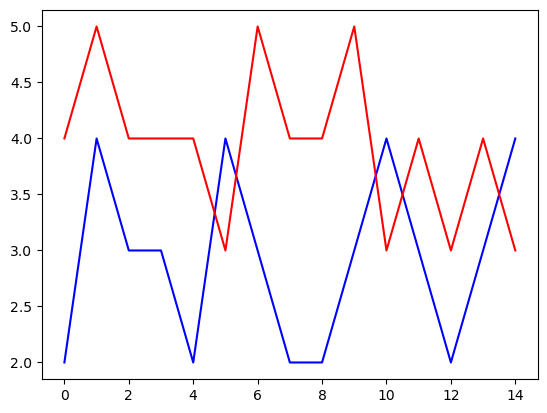

In [74]:
pepper_m_engagement_m = survey_df[survey_df['pepper']=='Pepper M']['engagement']
pepper_m_engagement_m

plt.plot(list(range(0, len(pepper_m_engagement_m))), pepper_m_engagement_m, 'b')
pepper_m_engagement_a = survey_df[survey_df['pepper']=='Pepper A']['engagement']
pepper_m_engagement_a

plt.plot(list(range(0, len(pepper_m_engagement_a))), pepper_m_engagement_a, 'r')

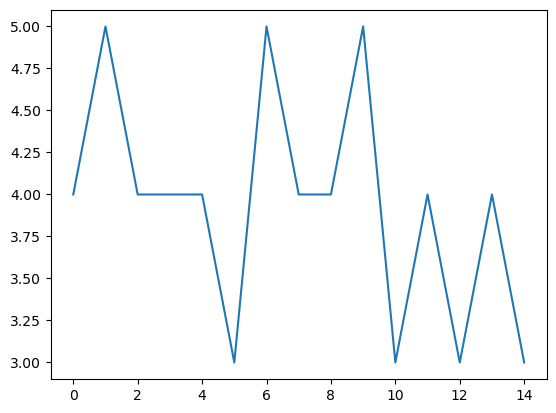

In [73]:
pepper_m_engagement_a = survey_df[survey_df['pepper']=='Pepper A']['engagement']
pepper_m_engagement_a

plt.plot(list(range(0, len(pepper_m_engagement_a))), pepper_m_engagement_a)

